## Ridge Using Sklearn

In [1]:
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt 
import numpy as np

In [20]:
X, y = make_regression(n_samples=400, n_features=1, n_informative=1, n_targets=1, noise=30, random_state=42)

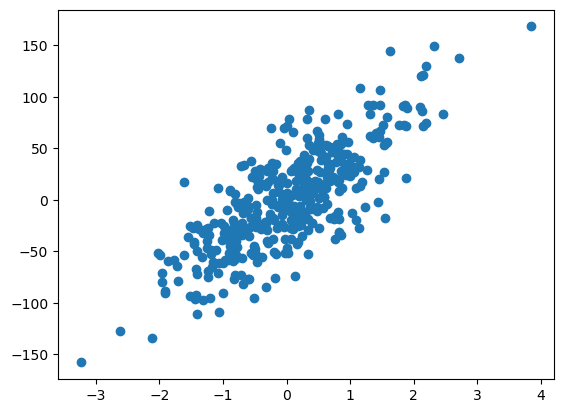

In [22]:
plt.scatter(X, y)
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()
L.fit(X, y)

LinearRegression()

In [24]:
L.coef_

array([39.76111232])

In [25]:
L.intercept_

-0.916194385603003

In [26]:
from sklearn.linear_model import Ridge

In [39]:
R = Ridge(alpha=20)
R.fit(X, y)
R.coef_

array([37.71131563])

In [40]:
R.intercept_

-0.8699743175687801

In [58]:
R1 = Ridge(alpha=200)
R1.fit(X, y)
print(R1.coef_)
print(R1.intercept_)

[25.75953164]
-0.600478191349041


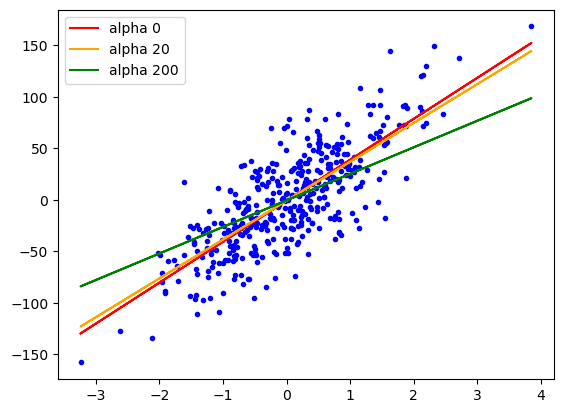

In [60]:
plt.plot(X, y, 'b.')
plt.plot(X, L.predict(X), color='red', label='alpha 0')
plt.plot(X, R.predict(X), color='orange', label='alpha 20')
plt.plot(X, R1.predict(X), color='green', label='alpha 200')
plt.legend()

## Ridge from scratch

In [61]:
class Ridge2D():
    
    def __init__(self, alpha=0.1):
        self.alpha = alpha 
        self.m = None
        self.b = None
        
    def fit(self, X_train, y_train):
        
        num = 0
        denom = 0
        
        for i in range(X_train.shape[0]):
            
            num += (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean())
            denom += (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()) 
        
        denom = denom + self.alpha
        
        self.m = num / denom
        
        self.b = y_train.mean() - (self.m * X_train.mean())
        
        print(self.m)
        print(self.b)
        
    
    def predict(self, X_train, y_train):
        pass

In [71]:
R_scratch = Ridge2D(alpha = 200)

In [72]:
R_scratch.fit(X, y)

[25.75953164]
[-0.60047819]


### Ridge of Nd data, using sklearn

In [101]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score 

In [102]:
X, y = load_diabetes(return_X_y=True)

In [103]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
ndRdige = Ridge(alpha=0.1, solver='svd')
ndRdige.fit(X_train, y_train)

Ridge(alpha=0.1, solver='svd')

In [131]:
y_pred = ndRdige.predict(X_test)
r2_score(y_test, y_pred)

0.46085219464119254

In [132]:
print(ndRdige.coef_)

[  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]


In [133]:
ndRdige.intercept_

151.4585745667961

### ND Ridge from scratch

In [138]:
class NdRidge():
    
    def __init__(self, alpha = 0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    
    def fit(self, X_train, y_train):
        
        X_train = np.insert(X_train, 0, 1, axis = 1)
        I = np.identity(X_train.shape[1])
        
        result = np.linalg.inv(np.dot(X_train.T, X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [139]:
nd = NdRidge()
nd.fit(X_train, y_train)
y_pred = nd.predict(X_test)

r2_score(y_pred, y_test)

print(nd.coef_)
print(nd.intercept_)

[  42.87709893 -205.49834268  505.10960427  317.09526097 -108.51126124
  -86.2562279  -190.37246178  151.70037599  392.29679967   79.93194581]
151.4155298431294
